# ATAC seq analysis

Assay for Transposase-Accessible Chromatin

In [11]:
import pandas as pd

## Analyzing Peaks

In [12]:
peaks = pd.read_csv("../data/psd.bulk.zfish_atac.10hpf.lg1x.csv")

In [13]:
peaks.head()

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
0,4.612648,5.204557,3.391132,4.552681,3.668004,4.766655,4.012215,4.486644,4.463738,4.861570,3.614023,3.696712,3.210026,4.679626,4.277916
1,4.721959,5.358137,3.557652,4.688727,3.546239,4.748463,4.012215,4.399901,4.690443,4.848311,3.776074,3.959122,3.531244,4.750276,4.439449
2,4.806994,5.338711,3.360469,4.163852,3.668004,4.955051,4.129443,4.353534,4.787046,4.735389,3.574781,4.325414,4.545861,4.917399,5.058778
3,4.879061,5.578282,4.236443,4.404106,4.145129,4.893466,4.429041,4.558759,4.650654,4.885431,4.076645,4.572297,4.306987,5.019714,4.859518
4,5.052703,5.736003,4.323331,4.790483,4.440677,5.033977,4.375875,4.868698,5.025405,5.054618,4.130548,4.473848,4.426082,5.211885,5.306444


In [14]:
peaks.shape

(370058, 15)

In [55]:
peaks.columns

Index(['anterior/posterior axis', 'central nervous system', 'forebrain',
       'immature eye', 'integument', 'lateral plate mesoderm',
       'mesenchyme cell', 'musculature system', 'neural crest', 'neural keel',
       'neural stem cell', 'periderm/epidermis', 'primary neuron',
       'segmental plate', 'YSL'],
      dtype='object')

### To do

- ✅ Check if the distribution of all the cell types are similar
- ✅ Look at the counts of the cell types
- ✅ Look at the distributions of the max, min, medium of the peaks (locations and regions in the genome)
- ✅ Look at the distribution of standard deviation and coefficient of variation (R2) of the peaks
- Use the gRELU package to train the model:
    - Start with a snippet e.g. 1000 peaks
    - If it works:
        - Extend to all peaks and run on GPU e.g. 480 (16 GB)
    - Get the model trained and then use the trained model to analyze seqs

### Distribution of all cell types

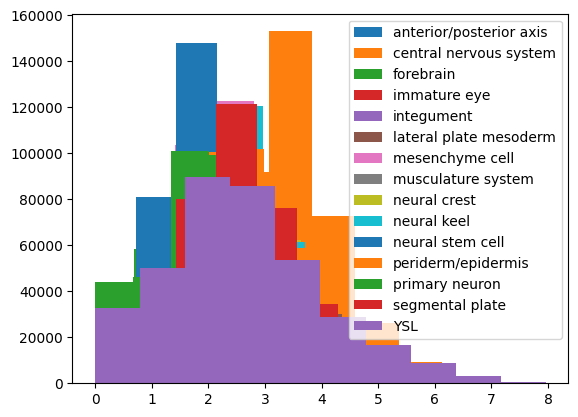

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

for cell_type in peaks.columns:
    plt.hist(peaks[cell_type], label = cell_type)

plt.legend()
plt.show()

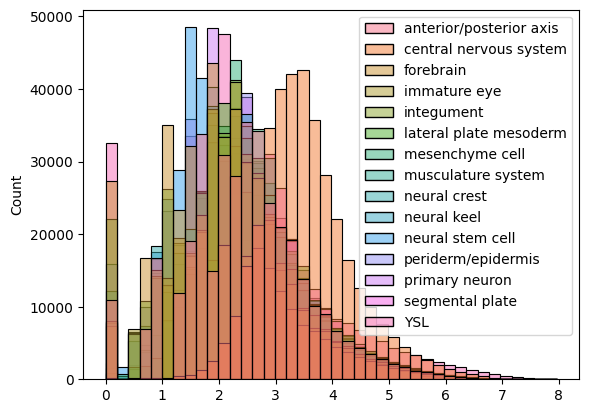

In [49]:
_ = sns.histplot(peaks, bins = 40)

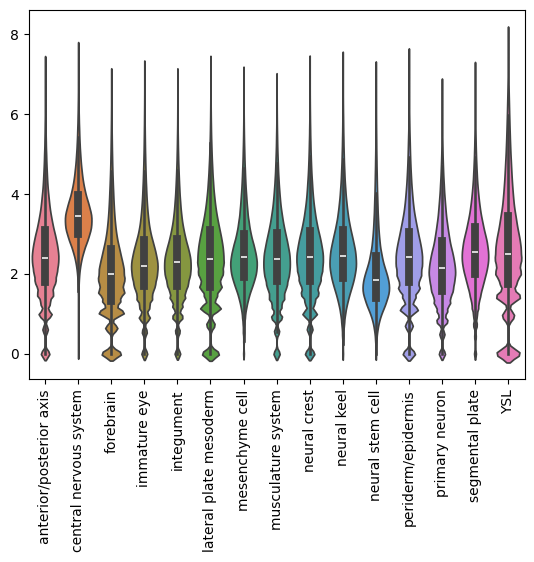

In [50]:
sns.violinplot(peaks)
plt.xticks(rotation = 90)
plt.show()

### Counts of Peaks of Cell Types

In [15]:
peaks.describe()

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
count,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000
mean,2.473024,3.536111,2.023562,2.321343,2.346497,2.407008,2.532922,2.425564,2.447764,2.572684,2.064080,2.437607,2.253972,2.627580,2.613370
std,1.070666,0.827313,1.127322,1.023766,0.973497,1.160747,0.923803,1.022150,1.079779,0.987327,0.987930,1.124375,1.003211,0.971848,1.435154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.789679,2.998886,1.305784,1.680234,1.703114,1.655804,1.915261,1.819059,1.807913,1.898183,1.401331,1.798457,1.559132,1.989127,1.747344
50%,2.395626,3.441339,1.984860,2.197871,2.300787,2.354598,2.409666,2.360297,2.415504,2.442039,1.841349,2.405200,2.141170,2.531056,2.489766
75%,3.081055,3.965430,2.606833,2.833898,2.860317,3.099481,3.004450,3.005098,3.062962,3.090720,2.451874,3.052174,2.812083,3.161576,3.434497
max,7.277513,7.664428,6.962817,7.172454,6.985725,7.268406,7.033311,6.855766,7.287214,7.398556,7.155829,7.462169,6.726133,7.145679,7.960923


### Distributions of Min, Max and Median of Cell Types

In [41]:
stats = peaks.describe().loc[['max', 'min', '50%']]

stats = stats.T
stats.columns = ['max', 'min', 'median']
print(stats)

                              max  min    median
anterior/posterior axis  7.277513  0.0  2.395626
central nervous system   7.664428  0.0  3.441339
forebrain                6.962817  0.0  1.984860
immature eye             7.172454  0.0  2.197871
integument               6.985725  0.0  2.300787
lateral plate mesoderm   7.268406  0.0  2.354598
mesenchyme cell          7.033311  0.0  2.409666
musculature system       6.855766  0.0  2.360297
neural crest             7.287214  0.0  2.415504
neural keel              7.398556  0.0  2.442039
neural stem cell         7.155829  0.0  1.841349
periderm/epidermis       7.462169  0.0  2.405200
primary neuron           6.726133  0.0  2.141170
segmental plate          7.145679  0.0  2.531056
YSL                      7.960923  0.0  2.489766


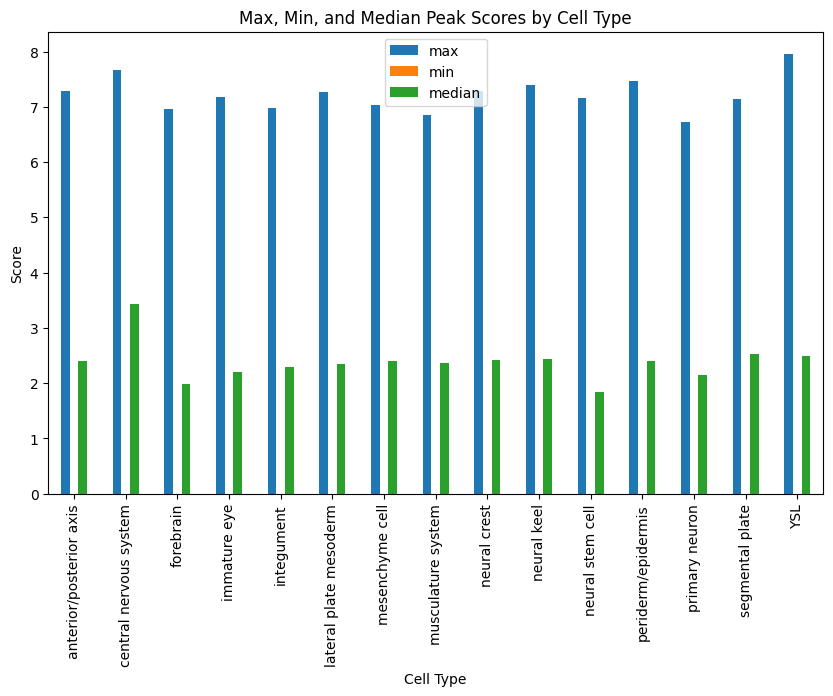

In [42]:
stats.plot(kind = 'bar', figsize= (10,6))
plt.title("Max, Min, and Median Peak Scores by Cell Type")
plt.ylabel("Score")
plt.xlabel("Cell Type")
plt.xticks(rotation = 90)
plt.show()

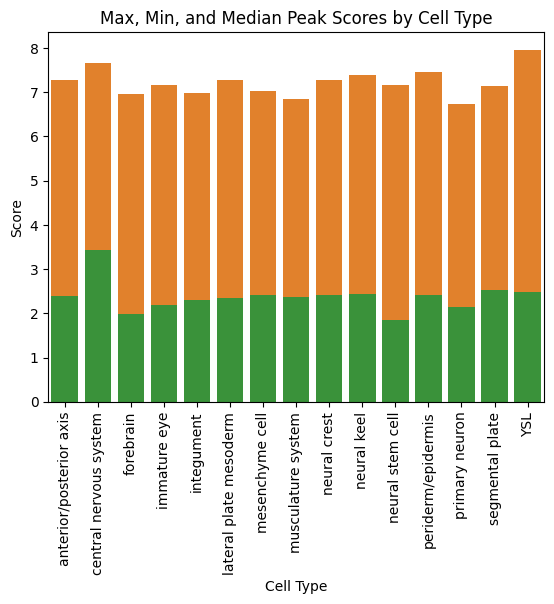

In [80]:
sns.barplot(stats, x = stats.index, y = 'min')
sns.barplot(stats, x = stats.index, y = 'max')
sns.barplot(stats, x = stats.index, y = 'median')
plt.title("Max, Min, and Median Peak Scores by Cell Type")
plt.ylabel("Score")
plt.xlabel("Cell Type")
plt.xticks(rotation = 90)
plt.show()

In [45]:
# Using seaborn
# Melting the dataframe to long format for easier visualization

melted_stats = stats.melt(var_name='cell_type', value_name='score')
melted_stats.head()

,cell_type,score
0,max,7.277513
1,max,7.664428
2,max,6.962817
3,max,7.172454
4,max,6.985725


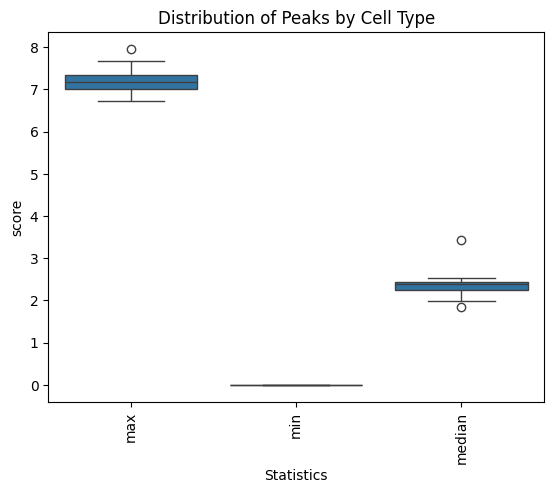

In [82]:
sns.boxplot(data = melted_stats, x = 'cell_type', y = 'score')
plt.xticks(rotation = 90)
plt.xlabel('Statistics')
plt.title('Distribution of Peaks by Cell Type')
plt.show()

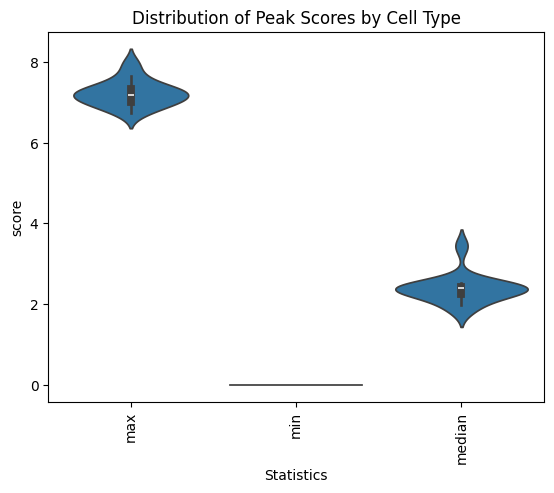

In [81]:
sns.violinplot(data=melted_stats, x='cell_type', y='score')
plt.xticks(rotation=90)
plt.xlabel('Statistics')
plt.title("Distribution of Peak Scores by Cell Type")
plt.show()


### Distributions of standard deviation and coefficient of variation

#### Standard deviation

In [54]:
stats_2 = peaks.describe().loc[['std', 'mean']]
stats_2 = stats_2.T
stats_2['coeff_var'] = stats_2['std']/stats_2['mean']
stats_2.columns = ['std', 'mean', 'coeff_var']
print(stats_2)

                              std      mean  coeff_var
anterior/posterior axis  1.070666  2.473024   0.432938
central nervous system   0.827313  3.536111   0.233961
forebrain                1.127322  2.023562   0.557098
immature eye             1.023766  2.321343   0.441023
integument               0.973497  2.346497   0.414872
lateral plate mesoderm   1.160747  2.407008   0.482237
mesenchyme cell          0.923803  2.532922   0.364718
musculature system       1.022150  2.425564   0.421407
neural crest             1.079779  2.447764   0.441129
neural keel              0.987327  2.572684   0.383773
neural stem cell         0.987930  2.064080   0.478630
periderm/epidermis       1.124375  2.437607   0.461262
primary neuron           1.003211  2.253972   0.445086
segmental plate          0.971848  2.627580   0.369864
YSL                      1.435154  2.613370   0.549158


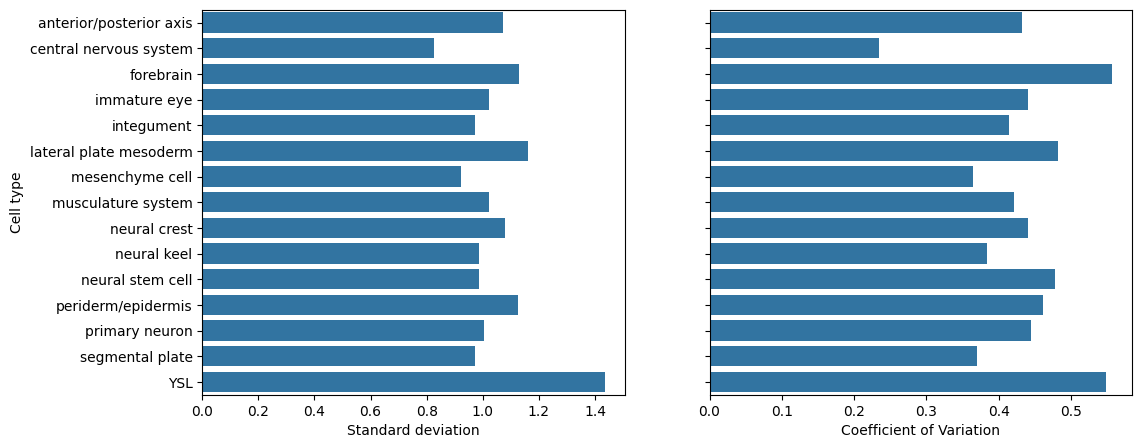

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
sns.barplot(stats_2, y = stats_2.index, x = 'std', ax = ax1)
sns.barplot(stats_2, y = stats_2.index, x = 'coeff_var', ax = ax2)
ax1.set_ylabel('Cell type')
ax1.set_xlabel('Standard deviation')
ax2.set_xlabel('Coefficient of Variation')
plt.show()

## Analyzing BED file

In [33]:
bed_data = pd.read_csv("../data/chromosomes.10hpf.bed", sep = '\t', header = None)
bed_data.columns = ['chrom', 'start', 'end', 'name', 'score', 'strand']

In [34]:
bed_data.head()

,chrom,start,end,name,score,strand
0,chr1,5231,5732,.,0,.
1,chr1,5786,6287,.,0,.
2,chr1,10087,10588,.,0,.
3,chr1,10990,11491,.,0,.
4,chr1,11894,12395,.,0,.


In [35]:
bed_data.describe()

,start,end,score
count,3.700580e+05,3.700580e+05,370058.0
mean,2.712686e+07,2.712736e+07,0.0
std,1.689309e+07,1.689309e+07,0.0
min,3.600000e+01,5.370000e+02,0.0
25%,1.321669e+07,1.321719e+07,0.0
50%,2.621427e+07,2.621477e+07,0.0
75%,3.948675e+07,3.948725e+07,0.0
max,7.808975e+07,7.809026e+07,0.0


In [40]:
bed_data['score'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
370053    0
370054    0
370055    0
370056    0
370057    0
Name: score, Length: 370058, dtype: int64>